# **Принцип наследования в ООП**

**Принцип наследования** является одним из основных принципов объектно-ориентированного программирования (ООП). Наследование позволяет создавать новые классы, называемые *дочерними* (subclasses), на основе уже существующих классов, называемых *родительскими* (parent). Дочерние классы наследуют все свойства и методы родительских классов, а также могут добавлять свои собственные. Это позволяет создавать иерархию классов, упрощает повторное использование кода и способствует модульности программы.

**Родительский класс**, также известный как *базовый класс* или *суперкласс*, это класс, от которого наследуются другие классы. Он содержит общие свойства и методы, которые могут быть использованы его подклассами. Родительский класс определяет базовую функциональность, которая может быть расширена или изменена в потомках.

**Дочерний класс**, также известный как *подкласс* (от англ. "subclass") или *производный класс*, это класс, который наследует свойства и методы от родительского класса. Потомок может добавлять новые атрибуты и методы, а также переопределять или расширять унаследованные от родителя.

Проверить, является ли один класс подклассом другого, позволяет функция `issubclass(class, classinfo)`. Параметр `class` - класс, который проверяем. Параметр `classinfo` - класс или кортеж с классами, на принадлежность кому проверяем. Возвращает `True`, если переданный `class` является подклассом значения, которое передано в `classinfo`. При этом не важно, является ли родство между ними прямым или косвенным (через несколько наследников).

Функция `isinstance()` позволяет определять принадлежность экземпляров к определенному классу **с учетом иерархии** (см. пример).

**Примечание:** важно отметить, что класс считается подклассом самого себя.

In [ ]:
# пример реализации наследования
class Person:
    def can_sleep(self):
        print("Я могу спать")
    def can_walk(self):
        print("Я могу ходить")


class Doctor(Person):
    def can_cure(self):
        print("Я могу лечить")


class Architect(Person):
    def can_build(self):
        print("Я могу строить")


class Teacher(Person):
    def can_teach(self):
        print("Я могу учить")

doctor = Doctor()
doctor.can_walk() # Я могу ходить
doctor.can_cure() # Я могу лечить

t = Teacher()
t.can_sleep() # Я могу спать
t.can_teach() # Я могу учить

print(issubclass(Architect, (Doctor, Person))) # True
print(isinstance(t, Person)) # True

# **Виды наследования**

В *Python* **наследование** - это способ создания новых классов, основанных на уже существующих классах, что позволяет повторно использовать код и способствует принципу DRY (Don't Repeat Yourself). По структуре наследования классов можно выделить следующие типы:
* *Одиночное наследование*.
* *Многоуровневое наследование*.
* *Множественное наследование*.
* *Иерархическое наследование*.
* *Гибридное наследование*.

В **одиночном наследовании** подкласс наследует свойства и методы только одного родительского класса. Это самая простая форма наследования.

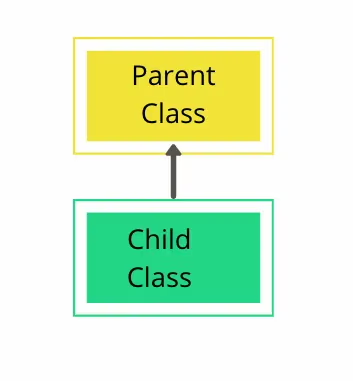

В **многоуровневом наследовании** подкласс наследует свойства и методы от одного родительского класса, который в свою очередь наследует свойства и методы от другого родительского класса. Это создает иерархическую цепочку наследования.

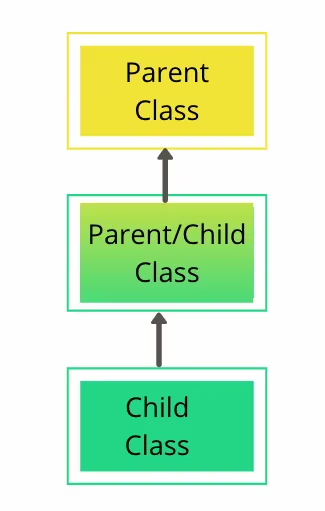

В **множественном наследовании** подкласс наследует свойства и методы нескольких родительских классов. Это позволяет подклассу объединять свойства и методы двух или более классов.

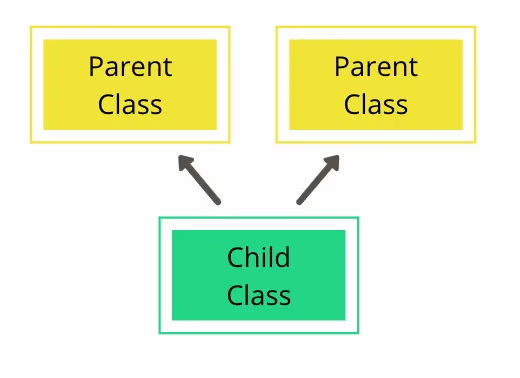

**Иерархическое наследование** - тип наследования, при котором несколько подклассов наследуют свойства и методы от одного родительского класса. В иерархическом наследовании есть один базовый класс и несколько производных классов, которые наследуют свойства и методы от базового класса. Каждый производный класс может иметь свои собственные методы и свойства, но он также наследует свойства и методы от базового класса.

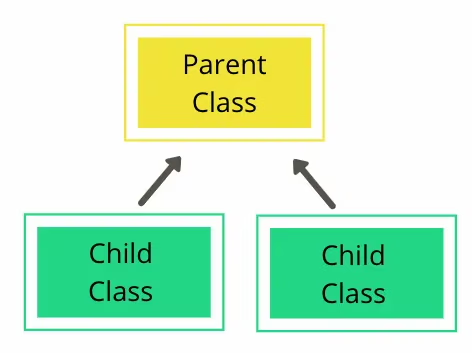

**Гибридное наследование** - это тип наследования, который комбинирует два или более типа наследования (например, множественное и одиночное наследование). В гибридном наследовании можно создавать классы, которые наследуют свойства и методы от нескольких классов.

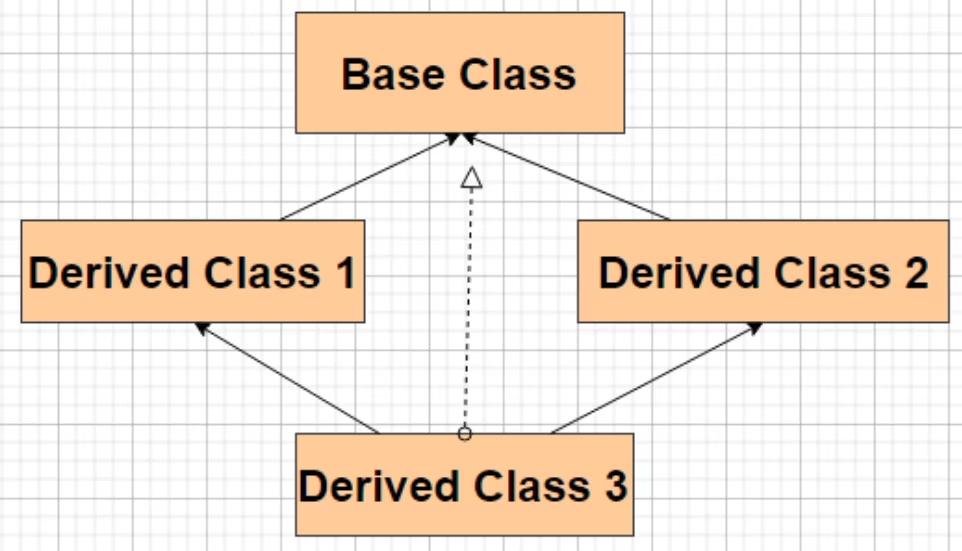

# **Наследование от `object` и других встроенных типов**

Любое значение в *Python* — строка, число, список и т.д. — является объектом. Под объектом в *Python* подразумевается предопределенный класс `object`. Он является базовым классом в иерархии классов, иными словами, все встроенные или определённые пользователем классы неявным образом наследуют от него.

Класс `object` всегда стоит во главе любой иерархии. Он не пустой класс, в нем уже реализовано достаточно большое количество атрибутов и методов (см. ниже). Любой класс, даже пустой, наследует эти методы и атрибуты. Именно поэтому любые ЭК можно сравнивать на равенство (есть метод `__eq__` и др.) или вызывать у них текстовое представление (есть метод `__str__`).

Все встроенные типы данных (соответствующие им классы) также наследуют от `object`. Исключение - `bool`, который наследует от `int`.

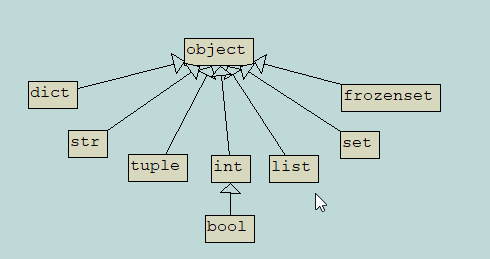

Встроенные классы могут быть родительскими для пользовательских классов (см. пример).

In [ ]:
print(dir(object))

# ['__class__',
#  '__delattr__',
#  '__dir__',
#  '__doc__',
#  '__eq__',
#  '__format__',
#  '__ge__',
#  '__getattribute__',
#  '__getstate__',
#  '__gt__',
#  '__hash__',
#  '__init__',
#  '__init_subclass__',
#  '__le__',
#  '__lt__',
#  '__ne__',
#  '__new__',
#  '__reduce__',
#  '__reduce_ex__',
#  '__repr__',
#  '__setattr__',
#  '__sizeof__',
#  '__str__',
#  '__subclasshook__']

In [ ]:
# пример наследования от встроенного класса
class MyList(list): # ЭК получит все методы списков + реализованный ниже
    def remove_all(self, value):
        self[:] = [i for i in self if i != value] # почему-то для того, чтобы перезаписать список, надо использовать именно self[:]
        # а вообще, обращение к значениям всех встроенных типов данных именно через self
        return None
    

a = MyList() # self = []
print(a) # []


# ещё пример
class NewInt(int):
    def repeat(self, n=2):
        return int(f'{self}'*n)
    
    def to_bin(self):
        return int(str(bin(self))[2:])
    

c1 = NewInt(9)
print(c1.repeat(4)) # 9999
print(c1.to_bin()) # 1001

# **Класс `type`, атрибуты `__class__` и `__base__`**

`type` - не функция (как казалось ранее), а класс. Класс `type` может использоваться для двух целей:
1. Определение типа объекта.
2. Создание нового типа или класса (подробнее в разделе про метапрограммирование).

Вызов `type(ЭК)` возвращает класс, от которого был создан экземпляр. Результатом же вызова `type(class)` всегда будет `type`.

Еще одним способом, который позволяет узнать класс, при помощи которого был создан объект, является атрибут `__class__`. Использование его через точку к любому объекту позволяет узнать его класс.

Атрибут `__base__` содержит ссылку на прямого родителя для данного класса. Для класса `object` это значение `None`. Для класса, у которого явно не задан базовый класс, атрибут `__base__` будет хранить ссылку на класс `object`.

In [ ]:
n = 12
print(type(n), type(type(n))) # <class 'int'> <class 'type'>
print(n.__class__, type(n).__class__) # <class 'int'> <class 'type'>
print(type(n).__base__) # <class 'object'>